In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.read_csv("740509512_72018_80_airline_delay_causes.csv")
df.shape

(244310, 22)

In [2]:
df.loc[0,:]

year                                                                2003
 month                                                                 6
carrier                                                               AA
carrier_name                                      American Airlines Inc.
airport                                                              ABQ
airport_name           Albuquerque, NM: Albuquerque International Sun...
arr_flights                                                          307
arr_del15                                                             56
carrier_ct                                                         14.68
 weather_ct                                                        10.79
nas_ct                                                             19.09
security_ct                                                         1.48
late_aircraft_ct                                                    9.96
arr_cancelled                                      

In [66]:
df['on_time'] = df['arr_flights'] - df['carrier_ct'] - df[' weather_ct'] - df['nas_ct'] - df['security_ct'] - df['late_aircraft_ct'] - df['arr_cancelled'] - df['arr_diverted']
df['not_on_time'] = df['arr_flights'] - df['on_time']
df['weather_impact'] = 100*(df['nas_ct']/df['not_on_time'])
df.shape

(244310, 25)

In [67]:
# carrier_ct: Air Carrier Delay (25.6%)
# nas_ct: National Aviation System Delay (30.7%)
# late_aircraft_ct: Aircraft Arriving Late (31.4%)

df[['carrier_ct',' weather_ct', 'nas_ct', 'security_ct','late_aircraft_ct', 'arr_cancelled','arr_diverted']].sum().sum()

21259684.50000001

In [68]:
grouped_data = df.groupby(['year', 'carrier_name']).mean()
grouped_data.head(3)

month  arr_flights  arr_del15  \
year carrier_name                                                    
2003 ATA Airlines d/b/a ATA       9.000000   215.403061  37.362245   
     AirTran Airways Corporation  8.958955   323.705224  70.518657   
     Alaska Airlines Inc.         8.990625   308.546875  56.553125   

                                  carrier_ct   weather_ct     nas_ct  \
year carrier_name                                                      
2003 ATA Airlines d/b/a ATA         7.327551     0.401837  18.344337   
     AirTran Airways Corporation   11.237127     1.155224  31.309515   
     Alaska Airlines Inc.          17.569063     0.814062  14.053594   

                                  security_ct  late_aircraft_ct  \
year carrier_name                                                 
2003 ATA Airlines d/b/a ATA          0.560612         10.727959   
     AirTran Airways Corporation     0.000000         26.817127   
     Alaska Airlines Inc.            0.850750         23.265344   

                                  arr_cancelled  arr_diverted    arr_delay  \
year carrier_name                                                            
2003 ATA Airlines d/b/a ATA            2.091837      0.153061  2197.382653   
     AirTran Airways Corporation       2.944030      0.567164  3788.507463   
     Alaska Airlines Inc.              5.862500      0.793750  2610.187500   

                                   carrier_delay  weather_delay    nas_delay  \
year carrier_name                                                              
2003 ATA Airlines d/b/a ATA           455.795918      41.362245   903.020408   
     AirTran Airways Corporation      551.481343      87.276119  1422.940299   
     Alaska Airlines Inc.             929.925000      47.890625   441.100000   

                                  security_delay  late_aircraft_delay  \
year carrier_name                                                       
2003 ATA Airlines d/b/a ATA            20.530612           776.673469   
     AirTran Airways Corporation        0.000000          1726.809701   
     Alaska Airlines Inc.              22.656250          1168.615625   

                                  Unnamed: 21     on_time  not_on_time  \
year carrier_name                                                        
2003 ATA Airlines d/b/a ATA               NaN  175.795867    39.607194   
     AirTran Airways Corporation          NaN  249.675037    74.030187   
     Alaska Airlines Inc.                 NaN  245.337812    63.209063   

                                  weather_impact  
year carrier_name                                 
2003 ATA Airlines d/b/a ATA            43.578827  
     AirTran Airways Corporation       34.068605  
     Alaska Airlines Inc.              21.095440

In [69]:
final_df = grouped_data['weather_impact'].unstack().dropna(axis='columns')
final_df

carrier_name,Alaska Airlines Inc.,American Airlines Inc.,Delta Air Lines Inc.,ExpressJet Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,SkyWest Airlines Inc.,Southwest Airlines Co.,United Air Lines Inc.
year,,,,,,,,,
2003,21.095440,33.502984,46.743131,48.970594,0.723957,38.688278,7.810852,16.588188,36.361761
2004,18.165363,29.762167,37.412328,49.100504,1.737634,39.167587,9.257791,15.919929,34.488683
2005,20.186006,28.632666,31.044031,39.076239,1.799238,44.135553,6.339281,14.921810,28.940580
2006,26.834929,27.762638,31.929596,34.871706,1.537382,47.571921,2.608349,13.541308,26.233117
2007,24.830081,25.045357,32.862289,27.930156,0.780313,40.417684,2.326373,14.840234,25.808746
2008,29.797382,26.339906,36.824217,28.630797,0.390354,39.946156,19.709964,14.567473,23.017490
2009,37.717486,24.229802,36.160103,36.858478,0.556537,37.096897,25.325118,13.860137,23.348986
2010,37.625337,24.876568,26.978334,27.065349,0.609485,28.995040,22.272581,12.532596,24.357497
2011,37.433856,24.747852,27.958154,22.001302,0.506503,30.855831,23.522386,12.804795,27.923028


In [70]:
list(final_df)

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'Delta Air Lines Inc.',
 'ExpressJet Airlines Inc.',
 'Hawaiian Airlines Inc.',
 'JetBlue Airways',
 'SkyWest Airlines Inc.',
 'Southwest Airlines Co.',
 'United Air Lines Inc.']

In [75]:
final_df=final_df.drop(['Alaska Airlines Inc.','ExpressJet Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.'],1)

Text(0.5,1,'On Time Performance of US Air Carrier')

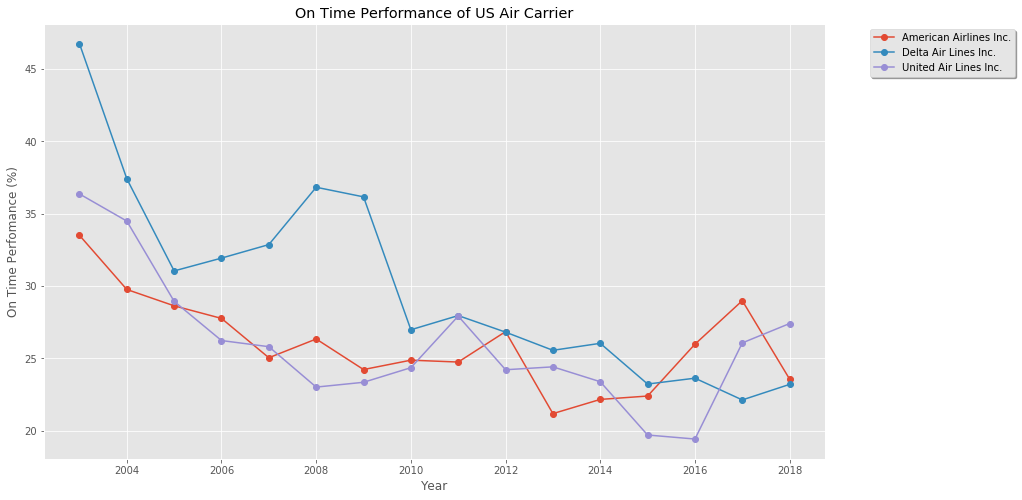

In [76]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
final_df.plot(ax=ax, figsize=(14,8), grid=True, style='o-')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), shadow=True, ncol=1)
plt.ylabel('On Time Perfomance (%)')
plt.xlabel('Year')
plt.title('On Time Performance of US Air Carrier')

In [77]:
final_df.T

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
carrier_name,,,,,,,,,,,,,,,,
American Airlines Inc.,33.502984,29.762167,28.632666,27.762638,25.045357,26.339906,24.229802,24.876568,24.747852,26.849802,21.184623,22.165909,22.398923,25.980645,28.987226,23.564256
Delta Air Lines Inc.,46.743131,37.412328,31.044031,31.929596,32.862289,36.824217,36.160103,26.978334,27.958154,26.813403,25.558577,26.041372,23.227762,23.632949,22.130272,23.205764
United Air Lines Inc.,36.361761,34.488683,28.940580,26.233117,25.808746,23.017490,23.348986,24.357497,27.923028,24.215470,24.416433,23.388711,19.706809,19.428688,26.070410,27.409214


In [78]:
final_df.T.to_csv('final_df.tsv', sep='\t', encoding='utf-8')